<center><img src="images/header.png"></center>

<h1><center>Лекция №4: Введение в машинное обучение</center></h1>
<hr>
<h2><center>Методы обучения без учителя: Кластеризация (практика)</center></h2>
<h3><center>Шестаков Андрей</center></h3>

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-talk')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

# Применение K-means

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.

In [3]:
df_sns = pd.read_csv('data/snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

#### Задание

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)

In [4]:
df_sns = df_sns.iloc[:, 4:]

In [6]:
X = df_sns.values

In [9]:
X_norm = (X - X.mean(axis=0))/X.std(axis=0)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(X)

/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
X_norm = scaler.transform(X)

/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [14]:
from sklearn.cluster import KMeans

In [15]:
model = KMeans(n_clusters=9, random_state=123)

In [16]:
model.fit(X_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [17]:
model.inertia_ # Значение критерия

861745.6454158238

In [19]:
model.cluster_centers_ # Координаты центройдов

(9, 36)

In [20]:
model.labels_ # Разбивка на кластеры

array([4, 0, 4, ..., 4, 4, 4], dtype=int32)

In [22]:
df_sns.loc[:, 'label'] = model.labels_

In [28]:
df_sns.label.value_counts()

4    20024
0     5036
1     1337
6      846
8      841
2      752
3      697
7      466
5        1
Name: label, dtype: int64

In [27]:
for label, group in df_sns.groupby('label'):
    print('='*10)
    print('Cluster {}'.format(label))
    means = group.iloc[:,:-1].mean().sort_values(ascending=False)
    print(means.head(10))

Cluster 0
music         1.066521
dance         1.051033
shopping      0.890191
cute          0.828435
basketball    0.722597
hair          0.691223
mall          0.652502
football      0.617752
god           0.573272
church        0.496426
dtype: float64
Cluster 1
drunk       1.409873
music       0.707554
hair        0.629020
god         0.522064
dance       0.439043
cute        0.384443
sex         0.380703
shopping    0.326103
mall        0.287210
die         0.275991
dtype: float64
Cluster 2
band        4.105053
marching    1.418883
music       1.215426
god         0.505319
dance       0.464096
hair        0.371011
rock        0.344415
shopping    0.289894
football    0.275266
cute        0.275266
dtype: float64
Cluster 3
soccer        4.901004
music         0.773314
shopping      0.499283
god           0.469154
hair          0.440459
basketball    0.428981
dance         0.398852
football      0.397418
cute          0.337159
church        0.321377
dtype: float64
Cluster 4
music     

# Рационы питания в странах

Загрузите набор данных о пищевом рационе в разных странах мира `diet.csv`

In [29]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [30]:
df = pd.read_csv('data/diet.csv', sep=';').iloc[:, :-1]

In [31]:
df.head()

,Countries,Energy (kcal/day),Protein (g/day),Fats (g/day),Carbohydrates (g/day),Animal Products + (kcal/day),Animal Fats (kcal/day),Bovine Meat (kcal/day),"Butter, Ghee (kcal/day)",Cheese (kcal/day),...,Soyabean Oil (kcal/day),Starchy Roots (kcal/day),Sugar & Sweeteners (kcal/day),Sugar (Raw Equivalent) (kcal/day),"Sugar, Raw Equivalent (kcal/day)","Sugar, Refined Equiv (kcal/day)",Vegetable Oils (kcal/day),Vegetables (kcal/day),Wheat (kcal/day),Wine (kcal/day)
0,Albania,2860.0,96,86,425.50,813.0,49,62,11,50,...,2,57,193,187,191,187,174,94,1166,6
1,Argentina,2980.0,94,100,426.00,823.0,72,342,28,90,...,43,100,406,337,405,337,311,51,914,59
2,Australia,3120.0,107,134,371.50,1033.0,124,142,62,107,...,17,87,423,407,415,407,435,67,559,39
3,Austria,3740.0,111,162,459.50,1219.0,320,59,102,193,...,89,113,437,404,424,404,442,61,617,55
4,Bangladesh,2200.0,48,25,445.75,65.0,5,5,3,0,...,48,42,59,29,59,29,131,10,180,0


In [49]:
idx = df.Countries == 'Iran'
df = df.loc[~idx]

In [50]:
scaler = RobustScaler()
X = df.iloc[:,1:].values

In [51]:
X_norm = scaler.fit_transform(X)


1. Отнормируйте данные с помощью `RobustScaler` или `StandardScaler`
2. Используйте метод K-средних. Выберите число кластеров с помощью критерия силуэта
3. Найдите выборосы и проинтерпретируйте кластеры
4. Примените Спектральную кластеризацию с affinity='nearest_neighbour' с тем же числом кластеров
5. Сравните полученные разбиения с помощью adjusted_rand_score

In [52]:
silh_score = []

for k in range(2, 10):
    model = KMeans(n_clusters=k, random_state=123)
    model.fit(X_norm)
    
    silh_score.append(
        silhouette_score(X_norm, model.labels_)
    )

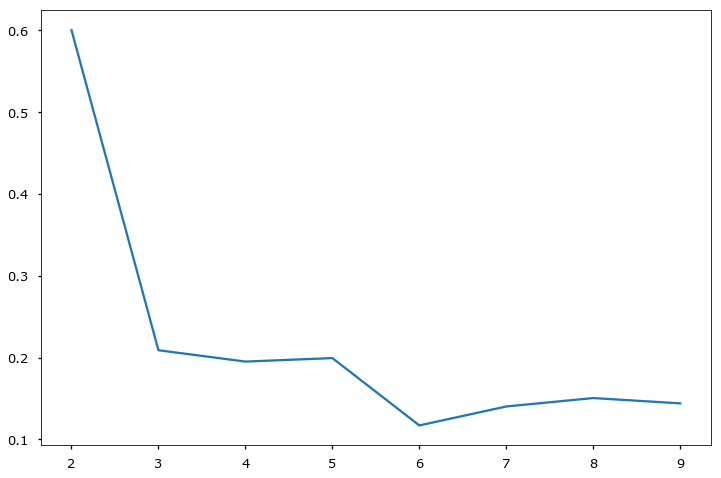

In [53]:
plt.plot(range(2, 10), silh_score)

In [54]:
model = KMeans(n_clusters=5)
model.fit(X_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [62]:
df.loc[:, 'labels'] = model.labels_

In [63]:
df.labels.value_counts()

1    30
2    25
4    21
0     6
3     3
Name: labels, dtype: int64

In [81]:
idx = df.labels == 1

In [82]:
df.loc[idx,'Countries']

0                    Albania
7                    Bolivia
8     Bosnia and Herzegovina
9                     Brazil
10                  Bulgaria
13                     Chile
15                  Colombia
16                Costa Rica
20        Dominican Republic
21                   Ecuador
22                     Egypt
25                      Fiji
29                   Georgia
33                 Guatemala
34                     Haiti
42                   Jamaica
44                     Kenya
45                   Lesotho
51                 Mauritius
52                    Mexico
54                   Morocco
58                  Pakistan
59                  Paraguay
68              Saudi Arabia
71              South Africa
78       Trinidad and Tobago
79                   Tunisia
80                    Turkey
82      United Arab Emirates
85                Uzbekistan
Name: Countries, dtype: object

In [83]:
((df.loc[idx].mean() - df.loc[~idx].mean())/df.std()).sort_values()

labels                                -1.235416
Pigmeat (kcal/day)                    -0.890931
Fish, Seafood (kcal/day)              -0.851502
Alcoholic Beverages (kcal/day)        -0.845262
Cheese (kcal/day)                     -0.832668
Pelagic Fish (kcal/day)               -0.801620
Freshwater Fish (kcal/day)            -0.758339
Wine (kcal/day)                       -0.757253
Animal Products + (kcal/day)          -0.695536
Coffee (kcal/day)                     -0.685934
Animal Fats (kcal/day)                -0.668303
Meat (kcal/day)                       -0.660870
Fats (g/day)                          -0.657331
Potatoes (kcal/day)                   -0.595357
Roots & Tuber Dry Equiv (kcal/day)    -0.589286
Starchy Roots (kcal/day)              -0.589286
Eggs (kcal/day)                       -0.578575
Honey (kcal/day)                      -0.577448
Apples (kcal/day)                     -0.559023
Protein (g/day)                       -0.525035
Fats, Animals, Raw (kcal/day)         -0